## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

C:\Users\useR\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\useR\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\useR\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\useR\

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
#Compile 模型
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 137us/step - loss: 2.2785 - acc: 0.1374 - val_loss: 2.2260 - val_acc: 0.1856
Epoch 2/500
50000/50000 [==============================] - 3s 62us/step - loss: 2.1958 - acc: 0.2077 - val_loss: 2.1703 - val_acc: 0.2274
Epoch 3/500
50000/50000 [==============================] - 3s 63us/step - loss: 2.1467 - acc: 0.2399 - val_loss: 2.1267 - val_acc: 0.2570
Epoch 4/500
50000/50000 [==============================] - 3s 62us/step - loss: 2.1066 - acc: 0.2605 - val_loss: 2.0903 - val_acc: 0.2719
Epoch 5/500
50000/50000 [==============================] - 3s 63us/step - loss: 2.0731 - acc: 0.2741 - val_loss: 2.0595 - val_acc: 0.2805
Epoch 6/500
50000/50000 [==============================] - 4s 77us/step - loss: 2.0447 - acc: 0.2836 - val_loss: 2.0331 - val_acc: 0.2889
Epoch 7/500
50000/50000 [==============================] - 3s 69us/step - loss: 2.0196 - acc: 0.2928 - val_loss: 2.0090 -

50000/50000 [==============================] - 3s 57us/step - loss: 1.6606 - acc: 0.4215 - val_loss: 1.6659 - val_acc: 0.4224
Epoch 60/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.6574 - acc: 0.4232 - val_loss: 1.6628 - val_acc: 0.4217
Epoch 61/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.6543 - acc: 0.4240 - val_loss: 1.6611 - val_acc: 0.4244
Epoch 62/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.6512 - acc: 0.4260 - val_loss: 1.6585 - val_acc: 0.4216
Epoch 63/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.6483 - acc: 0.4272 - val_loss: 1.6543 - val_acc: 0.4272
Epoch 64/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.6452 - acc: 0.4273 - val_loss: 1.6537 - val_acc: 0.4263
Epoch 65/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.6429 - acc: 0.4281 - val_loss: 1.6496 - val_acc: 0.4269
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.5246 - acc: 0.4686 - val_loss: 1.5491 - val_acc: 0.4539
Epoch 119/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.5229 - acc: 0.4694 - val_loss: 1.5460 - val_acc: 0.4552
Epoch 120/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.5214 - acc: 0.4701 - val_loss: 1.5469 - val_acc: 0.4571
Epoch 121/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.5197 - acc: 0.4697 - val_loss: 1.5453 - val_acc: 0.4604
Epoch 122/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.5177 - acc: 0.4715 - val_loss: 1.5440 - val_acc: 0.4545
Epoch 123/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.5163 - acc: 0.4711 - val_loss: 1.5434 - val_acc: 0.4584
Epoch 124/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.5143 - acc: 0.4731 - val_loss: 1.5396 - val_acc: 0.4587
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 62us/step - loss: 1.4346 - acc: 0.4997 - val_loss: 1.4945 - val_acc: 0.4716
Epoch 177/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.4333 - acc: 0.5004 - val_loss: 1.4831 - val_acc: 0.4725
Epoch 178/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.4320 - acc: 0.5011 - val_loss: 1.4953 - val_acc: 0.4721
Epoch 179/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.4305 - acc: 0.5013 - val_loss: 1.4791 - val_acc: 0.4782
Epoch 180/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.4294 - acc: 0.5009 - val_loss: 1.4770 - val_acc: 0.4781
Epoch 181/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.4276 - acc: 0.5021 - val_loss: 1.4878 - val_acc: 0.4717
Epoch 182/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.4265 - acc: 0.5037 - val_loss: 1.4780 - val_acc: 0.4746
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 59us/step - loss: 1.3597 - acc: 0.5243 - val_loss: 1.4355 - val_acc: 0.4904
Epoch 235/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.3586 - acc: 0.5246 - val_loss: 1.4333 - val_acc: 0.4924
Epoch 236/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.3572 - acc: 0.5256 - val_loss: 1.4409 - val_acc: 0.4883
Epoch 237/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.3562 - acc: 0.5256 - val_loss: 1.4407 - val_acc: 0.4907
Epoch 238/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.3552 - acc: 0.5259 - val_loss: 1.4330 - val_acc: 0.4942
Epoch 239/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.3536 - acc: 0.5257 - val_loss: 1.4378 - val_acc: 0.4900
Epoch 240/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.3524 - acc: 0.5267 - val_loss: 1.4394 - val_acc: 0.4870
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 59us/step - loss: 1.2915 - acc: 0.5485 - val_loss: 1.4009 - val_acc: 0.5054
Epoch 293/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.2909 - acc: 0.5480 - val_loss: 1.4050 - val_acc: 0.5047
Epoch 294/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.2894 - acc: 0.5494 - val_loss: 1.4171 - val_acc: 0.5015
Epoch 295/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.2883 - acc: 0.5490 - val_loss: 1.3970 - val_acc: 0.5048
Epoch 296/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.2868 - acc: 0.5491 - val_loss: 1.4012 - val_acc: 0.5031
Epoch 297/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.2862 - acc: 0.5496 - val_loss: 1.4194 - val_acc: 0.4940
Epoch 298/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.2845 - acc: 0.5497 - val_loss: 1.4012 - val_acc: 0.5056
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 63us/step - loss: 1.2281 - acc: 0.5691 - val_loss: 1.3742 - val_acc: 0.5148
Epoch 351/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.2269 - acc: 0.5710 - val_loss: 1.3789 - val_acc: 0.5104
Epoch 352/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.2259 - acc: 0.5711 - val_loss: 1.3690 - val_acc: 0.5136
Epoch 353/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.2251 - acc: 0.5714 - val_loss: 1.3920 - val_acc: 0.5074
Epoch 354/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.2243 - acc: 0.5703 - val_loss: 1.3675 - val_acc: 0.5164
Epoch 355/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.2223 - acc: 0.5702 - val_loss: 1.3672 - val_acc: 0.5204
Epoch 356/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.2219 - acc: 0.5720 - val_loss: 1.3925 - val_acc: 0.5038
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 58us/step - loss: 1.1673 - acc: 0.5913 - val_loss: 1.3808 - val_acc: 0.5170
Epoch 409/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.1668 - acc: 0.5914 - val_loss: 1.3659 - val_acc: 0.5167
Epoch 410/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.1650 - acc: 0.5923 - val_loss: 1.3479 - val_acc: 0.5231
Epoch 411/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.1647 - acc: 0.5925 - val_loss: 1.3609 - val_acc: 0.5227
Epoch 412/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.1637 - acc: 0.5926 - val_loss: 1.3679 - val_acc: 0.5175
Epoch 413/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.1620 - acc: 0.5935 - val_loss: 1.3593 - val_acc: 0.5231
Epoch 414/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.1607 - acc: 0.5947 - val_loss: 1.3742 - val_acc: 0.5148
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 58us/step - loss: 1.1071 - acc: 0.6133 - val_loss: 1.3344 - val_acc: 0.5291
Epoch 467/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.1088 - acc: 0.6129 - val_loss: 1.3362 - val_acc: 0.5280
Epoch 468/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.1068 - acc: 0.6130 - val_loss: 1.3571 - val_acc: 0.5192
Epoch 469/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.1063 - acc: 0.6122 - val_loss: 1.3583 - val_acc: 0.5168
Epoch 470/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.1038 - acc: 0.6130 - val_loss: 1.3499 - val_acc: 0.5209
Epoch 471/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.1040 - acc: 0.6123 - val_loss: 1.4346 - val_acc: 0.5046
Epoch 472/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.1032 - acc: 0.6152 - val_loss: 1.4150 - val_acc: 0.5068
Epoch 473/500
50000/50000 [=======

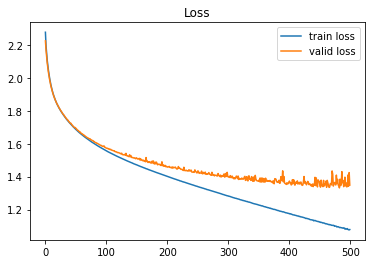

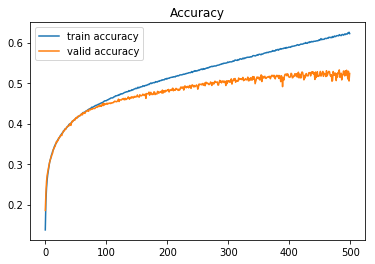

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()